In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df = df.iloc[:,1:]

In [6]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


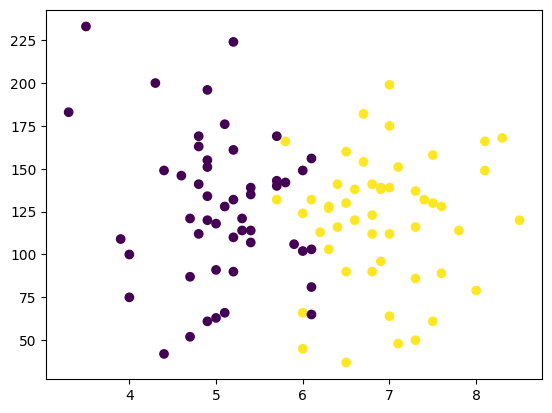

In [13]:
#EDA
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [7]:
#Extract Input and output
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [9]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [14]:
#split testing and training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(x,y,test_size=0.1)

In [15]:
X_train

,cgpa,iq
46,5.3,114.0
82,6.5,37.0
44,7.5,61.0
68,4.0,75.0
18,4.0,100.0
...,...,...
97,6.7,182.0
87,5.7,132.0
80,4.9,196.0
76,4.9,155.0


In [16]:
X_test

,cgpa,iq
16,5.2,224.0
89,4.9,151.0
7,5.0,63.0
48,6.6,138.0
54,6.4,141.0
40,4.9,134.0
49,5.4,135.0
45,6.0,66.0
3,7.4,132.0
21,7.1,151.0


In [17]:
y_test

16    0
89    0
7     0
48    1
54    1
40    0
49    0
45    1
3     1
21    1
Name: placement, dtype: int64

In [18]:
# Scaling our data between 1 and -1

from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_train

array([[-6.04676446e-01, -2.16147300e-01],
       [ 4.28631405e-01, -2.17932003e+00],
       [ 1.28972128e+00, -1.56742203e+00],
       [-1.72409329e+00, -1.21048154e+00],
       [-1.72409329e+00, -5.73087796e-01],
       [-1.03522138e+00,  1.18611893e+00],
       [ 2.56413430e-01,  1.15297446e-01],
       [-1.46576632e+00,  1.97648717e+00],
       [ 1.80637521e+00,  6.76203939e-01],
       [-1.03522138e+00,  1.03314443e+00],
       [-2.60240496e-01,  1.18611893e+00],
       [ 4.28631405e-01, -8.28045293e-01],
       [ 6.86958368e-01,  1.33144471e-02],
       [ 6.00849380e-01,  8.03682687e-01],
       [ 8.59176343e-01,  1.95099142e+00],
       [ 7.73067355e-01,  4.21246442e-01],
       [ 8.41954546e-02,  2.42776194e-01],
       [ 2.56413430e-01, -4.96600547e-01],
       [ 4.28631405e-01,  1.91784695e-01],
       [-6.90785434e-01, -8.28045293e-01],
       [-1.37965733e+00, -2.05184128e+00],
       [-1.37965733e+00,  6.76203939e-01],
       [-2.32685620e+00,  1.54305943e+00],
       [ 2.

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[-6.90785434e-01,  2.58838517e+00],
       [-9.49112397e-01,  7.27195438e-01],
       [-8.63003409e-01, -1.51643053e+00],
       [ 5.14740393e-01,  3.95750692e-01],
       [ 3.42522417e-01,  4.72237941e-01],
       [-9.49112397e-01,  2.93767694e-01],
       [-5.18567459e-01,  3.19263443e-01],
       [-1.91353306e-03, -1.43994328e+00],
       [ 1.20361229e+00,  2.42776194e-01],
       [ 9.45285331e-01,  7.27195438e-01]])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()

In [27]:
#model training
clf.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred = clf.predict(X_test)

In [29]:
y_test

16    0
89    0
7     0
48    1
54    1
40    0
49    0
45    1
3     1
21    1
Name: placement, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
#Now comparing the predicted and test values
accuracy_score(y_test,y_pred)

0.9

In [34]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 17.3 MB/s eta 0:00:00


In [36]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

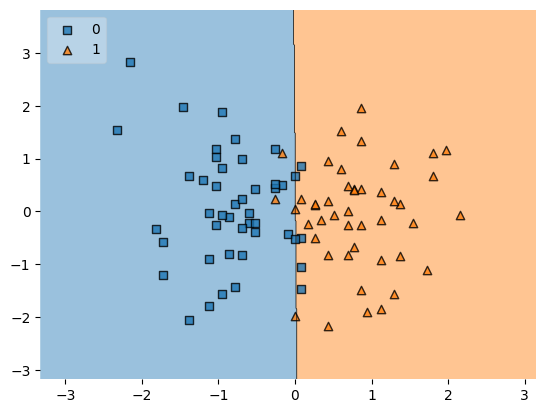

In [38]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [39]:
import pickle

In [40]:
pickle.dump(clf,open('model.pkl','wb'))